In [1]:
## Necessary packages
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import warnings
warnings.filterwarnings("ignore")

# 1. TimeGAN model
from VRAE import train
# 2. Data loading
from data_loading import real_data_loading, sine_data_generation
# 3. Metrics
# from metrics.discriminative_metrics import discriminative_score_metrics
# from metrics.predictive_metrics import predictive_score_metrics
from metrics.visualization_metrics import visualization

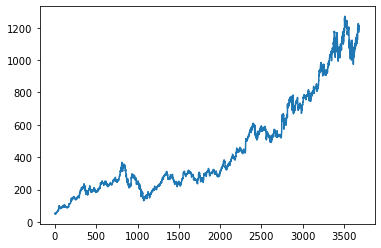

In [2]:
import numpy as np
import matplotlib.pyplot as plt
data = np.loadtxt('data/stock_data.csv', delimiter =",", skiprows = 1)
plt.plot(data[:,0])

In [3]:
## Data loading
data_name = 'stock'
seq_len = 48

if data_name in ['stock', 'energy']:
    ori_data = real_data_loading(data_name, seq_len)
elif data_name == 'sine':
    # Set number of samples and its dimensions
    no, dim = 10000, 5
    ori_data = sine_data_generation(no, seq_len, dim)
print(data_name + ' dataset is ready.')

stock dataset is ready.


In [4]:
## Newtork parameters
parameters = dict()
parameters['iterations'] = 1000
parameters['device'] = 'cuda:0'
parameters['batch_size'] = 128
parameters['seq_len'] = seq_len
parameters['feature_dim'] = ori_data[0].shape[1]
parameters['hidden_dim'] = 48
parameters['num_layer'] = 3
parameters['learning_rate'] = 1e-3
parameters['gamma'] = 0.1

In [5]:
# Run TimeGAN
generated_data = train(ori_data, parameters)
print('Finish Synthetic Data Generation')

epoch:0, loss:292.0206604003906, loss_negloglike:291.906982421875, loss_kl:1.1368353366851807
epoch:100, loss:8.588428497314453, loss_negloglike:6.575235843658447, loss_kl:20.131927490234375
epoch:200, loss:-11.430867195129395, loss_negloglike:-14.261960983276367, loss_kl:28.310935974121094
epoch:300, loss:-98.91779327392578, loss_negloglike:-104.14492797851562, loss_kl:52.27131652832031
epoch:400, loss:-122.39511108398438, loss_negloglike:-128.16522216796875, loss_kl:57.70112991333008
epoch:500, loss:-130.34542846679688, loss_negloglike:-136.7946014404297, loss_kl:64.49178314208984
epoch:600, loss:-141.4840087890625, loss_negloglike:-148.28208923339844, loss_kl:67.98088073730469
epoch:700, loss:-157.36729431152344, loss_negloglike:-164.34637451171875, loss_kl:69.79075622558594
epoch:800, loss:-164.123046875, loss_negloglike:-171.5548858642578, loss_kl:74.31843566894531
epoch:900, loss:-168.43881225585938, loss_negloglike:-175.81448364257812, loss_kl:73.75669860839844
Finish Synthetic 

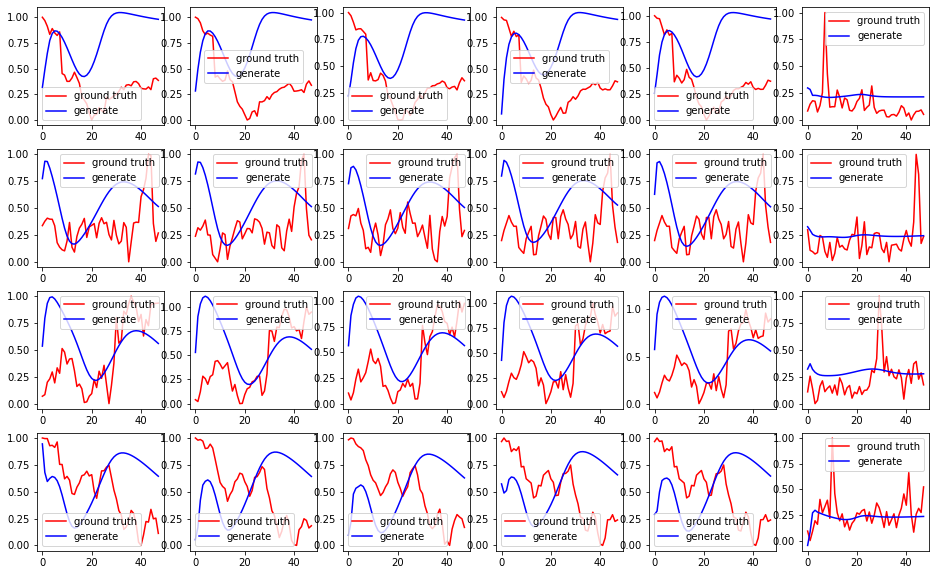

In [6]:
from matplotlib import pyplot as plt
fig, axs = plt.subplots(4, generated_data[0].shape[1], figsize=(16, 10))
for i in range(1000, 1004):
    for j in range(generated_data[0].shape[1]):
        axs[i % 4, j].plot(ori_data[i][:, j], 'red')
        axs[i % 4, j].plot(generated_data[i][:, j], 'blue')
        axs[i % 4, j].legend(['ground truth', 'generate'])

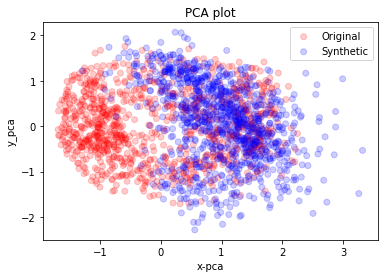

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.000s...
[t-SNE] Computed neighbors for 2000 samples in 0.125s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 0.431858
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.663200
[t-SNE] KL divergence after 300 iterations: 1.336913


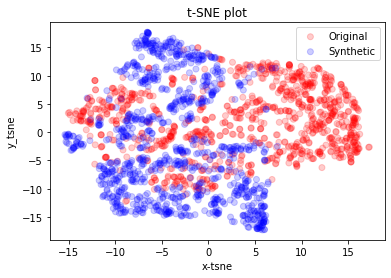

In [7]:
## Performance metrics
# 1. Visualization (PCA and tSNE)
visualization(ori_data, generated_data, 'pca')
visualization(ori_data, generated_data, 'tsne')